In [1]:
import pandas as pd
import numpy as np

In [2]:
mca = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
mca.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Show the dataframe shape.

In [3]:
mca.shape

(9134, 24)

In [4]:
mca.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

# Standardize header names.

In [5]:
mca.columns = mca.columns.str.replace('0', '').str.strip().str.lower().str.replace(' ', '_').str.replace(':', '')
#mca.columns = mca.columns.str.strip().lower().replace(' ', '_')
mca = mca.reset_index(drop=True)
#mca = mca.drop(['unnamed'], axis=1) 
mca.rename(columns = {'customer':'cust_id', 'employmentstatus':'employment_status'}, inplace = True) # for making readale
 
mca.head()

,cust_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
mca.columns

Index(['cust_id', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

# Which columns are numerical?

In [7]:
mca.dtypes

# Answer: All columns, that cpontain int and float data types are numerical

cust_id                           object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

# Which columns are categorical?

Answer:  (state?), response, coverage, education, employmentstatus, gender, policy_type, policy, renew_offer_type, sales_channel, vehile_class, vehicle_size, vehicle_type

In [8]:
# read file into a DataFrame
#mca = pd.read_csv('mca.csv')  # select categorical columns 
#categorical_cols = mca. select_dtypes(include=['object', 'category']).columns.tolist() 
#print("Categorical columns:", categorical_cols)
#Categorical columns: ['Customer', 'State', 'Education', 'Gender', 'Policy Type', 'Vehicle Class']

# Check and deal with NaN values.

nan in only in column vehicle Type. We assume, 

if A, then  it means automatic VT
else, by default the VT is manual VT.

So we replace nan with M vor manual VT.


In [9]:
'''mca['vehicle_type'] = mca['vehicle_type'].fillna('M')
mca['vehicle_type'].unique()'''

"mca['vehicle_type'] = mca['vehicle_type'].fillna('M')\nmca['vehicle_type'].unique()"

# Datetime format
Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [10]:
# add new coulmnn month and etract manth with th ehelp of pnadas dt. ...
mca['month'] = pd.DatetimeIndex(mca['effective_to_date']).month
mca.head()
#mca.shape to check if we have added a column, it must be 27 instead of 26

,cust_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


In [11]:
mca1= mca.copy()
#customers2[customers2['income']>0]
#mca1= mca1[mca1['month'] == 1] | mca[mca1['month'] == 2]
#mca1 = mca1.loc[mca1['month'] == 1, 'month'] | mca1[mca1['month'] == 2, 'month']
mca1[(mca1['month'] == 1) | (mca1['month'] == 2) | (mca1['month'] == 3)]

# It did not work with the OR operater so we figurerd out AND operator solution. 
# QUESTION TO TEACHER: Why is OR operator an issue ??

#mca1 = mca1[(mca1['month'] >= 1) & (mca1['month'] <=3)]
#mca1.head()

,cust_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,2
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,2
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,2
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,2


In [12]:
mca1.dtypes

cust_id                           object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
month           

# BONUS: Put all the previously mentioned data transformations into a function.

# START LAB ROUND 3

# Show data frame info

In [13]:
mca1.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_id                        9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

# Describe DataFrame.

In [14]:
mca1.describe()
mca1.dtypes
mca1.head()


,cust_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2


# Show a plot of the total number of responses.

In [15]:
mca1['response'].unique()

array(['No', 'Yes'], dtype=object)

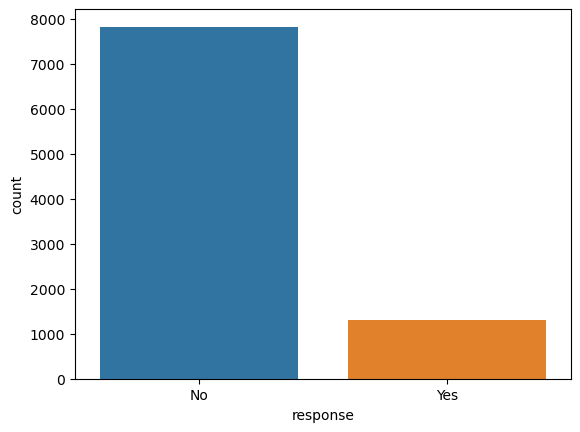

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

mca1['response'].value_counts()
sns.countplot(data=mca, x="response")
plt.show()

# Show a plot of the response rate by the sales channel.


In [17]:
mca1['sales_channel'].unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [18]:
# Distribution of  total responses yes+no) per channel, 
#sns.countplot(x="sales_channel", data=mca1)
#plt.show()

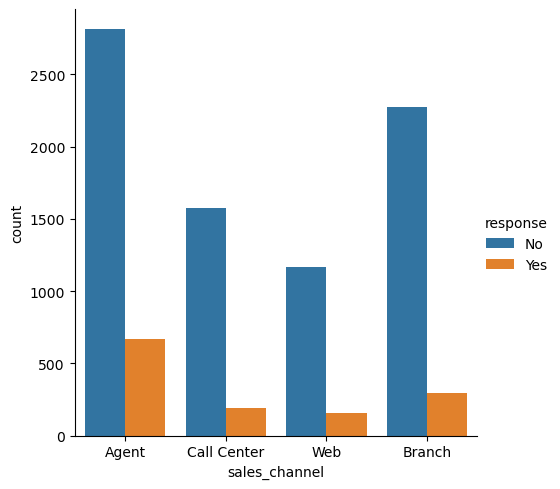

In [19]:
# Distribution of  diversive responses yes ,no per channel, 
sns.catplot(
    data=mca1, x="sales_channel", hue="response", kind="count"
)

# Show a plot of the response rate by the total claim amount.

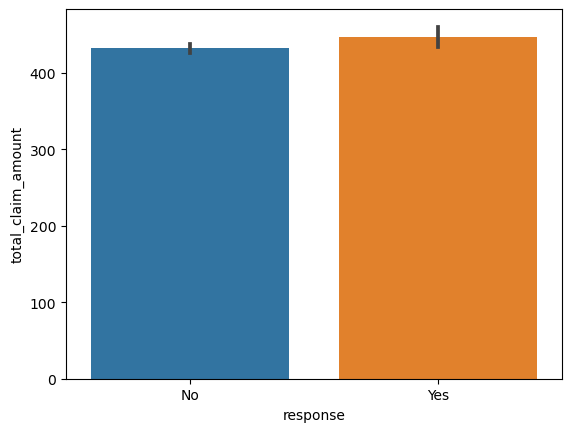

In [20]:
# Here I am not so sure, if this is the relevant plot
sns.barplot(data=mca1, x="response", y="total_claim_amount")
plt.show()

# Show a plot of the response rate by income.

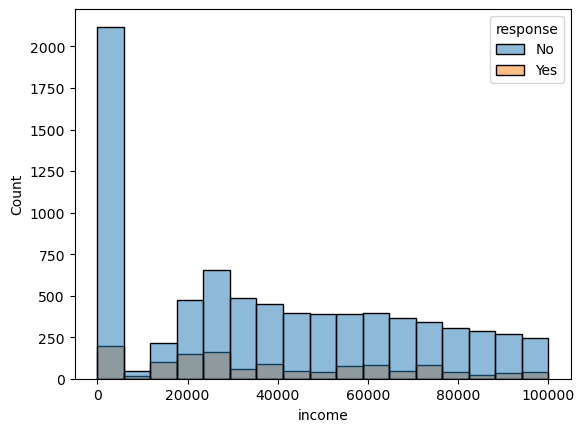

In [21]:
sns.histplot(x='income', hue='response', data=mca1)
plt.show()

# START LAB ROUND 4

# Check the data types of the columns. 
Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [22]:
mca1.dtypes

cust_id                           object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
month           

In [23]:
cols_n = mca1.select_dtypes([np.number]).columns
print (cols_n)
mca1.describe(include='number')

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month'],
      dtype='object')


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,1.463762
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,0.498712
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,1.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,1.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


In [24]:
cols_c = mca1.select_dtypes([object]).columns
print (cols_c)

mca1.describe(include='object')

Index(['cust_id', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


,cust_id,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,BU79786,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


# Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution

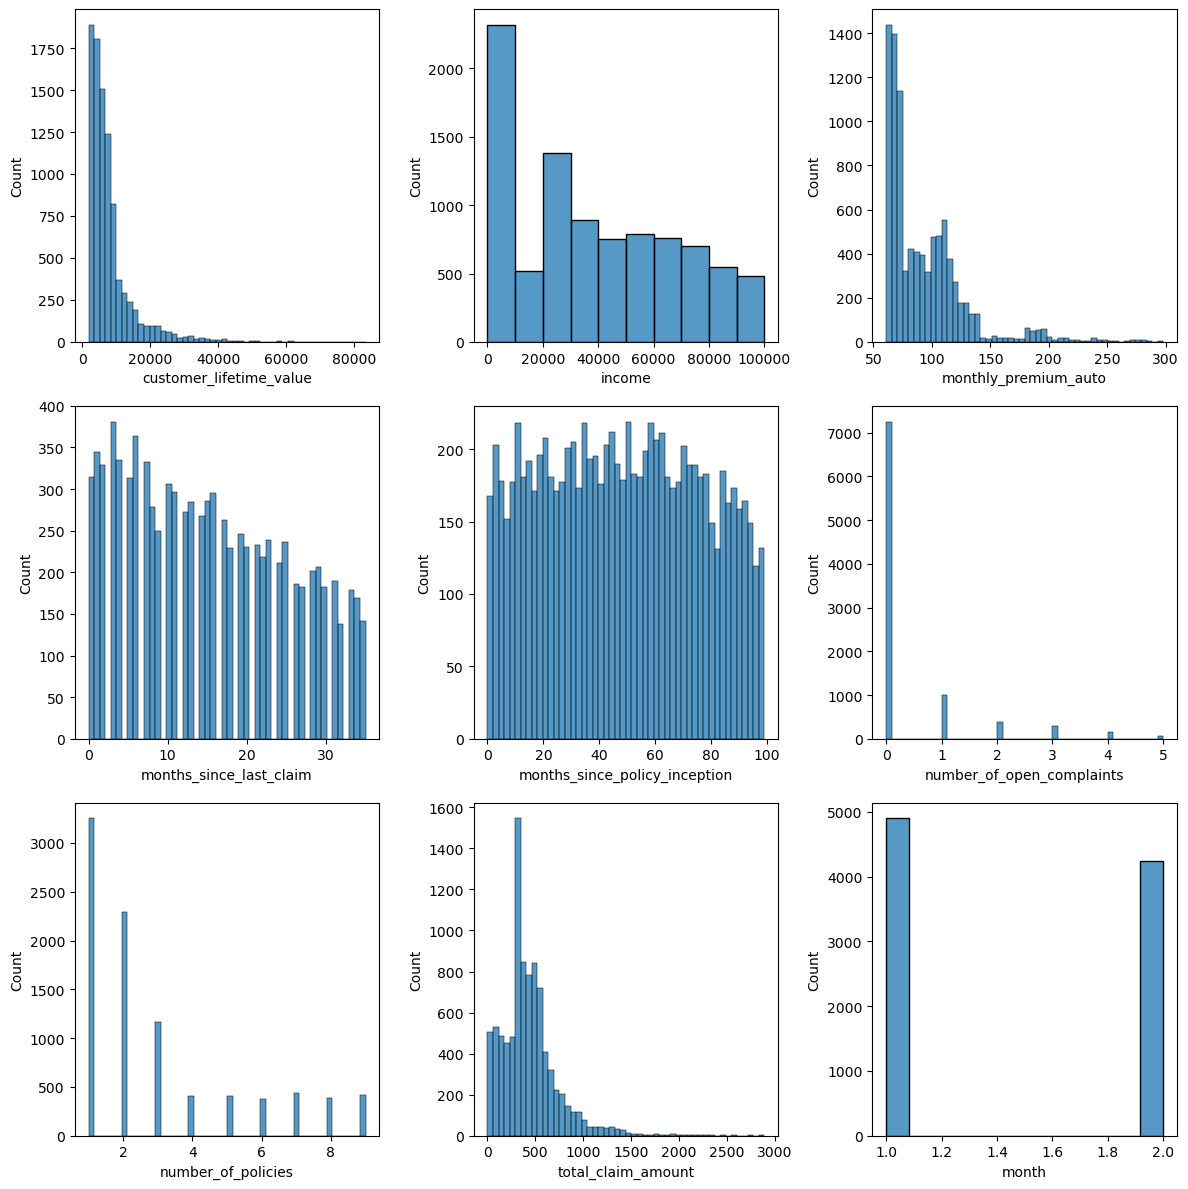

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# We have 9 Numerical colums to visualize , so I createa 3x3 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12)) # Try and error 

# plot the distribution of each variable in a separate subplot
sns.histplot(mca1['customer_lifetime_value'], ax=axes[0, 0], bins=50)
sns.histplot(mca1['income'], ax=axes[0, 1], bins=10)
sns.histplot(mca1['monthly_premium_auto'], ax=axes[0, 2], bins=50)
sns.histplot(mca1['months_since_last_claim'], ax=axes[1, 0], bins=50)
sns.histplot(mca1['months_since_policy_inception'], ax=axes[1, 1], bins=50)
sns.histplot(mca1['number_of_open_complaints'], ax=axes[1, 2], bins=50)
sns.histplot(mca1['number_of_policies'], ax=axes[2, 0], bins=50)
sns.histplot(mca1['total_claim_amount'], ax=axes[2, 1], bins=50)
sns.histplot(mca1['month'], ax=axes[2, 2], bins=12)

# adjust spacing between subplots
plt.tight_layout()
plt.show()

# Do the distributions for different numerical variables look like a normal distribution

ANSWER: I cannot seee any histogram that has normal distribution or close to normal.

fig, ax = plt.subplots(figsize=(5,5)) 
ax.scatter(x=mca1['customer_lifetime_value'], y=mca1['month']) # s -> marker size
#ax.plot(shoe_size, shoe_size, c="green")
ax.set_xlabel('Customerlifetime V')
ax.set_ylabel('Month')
#ax.set_title("Checking relationships")
plt.show()

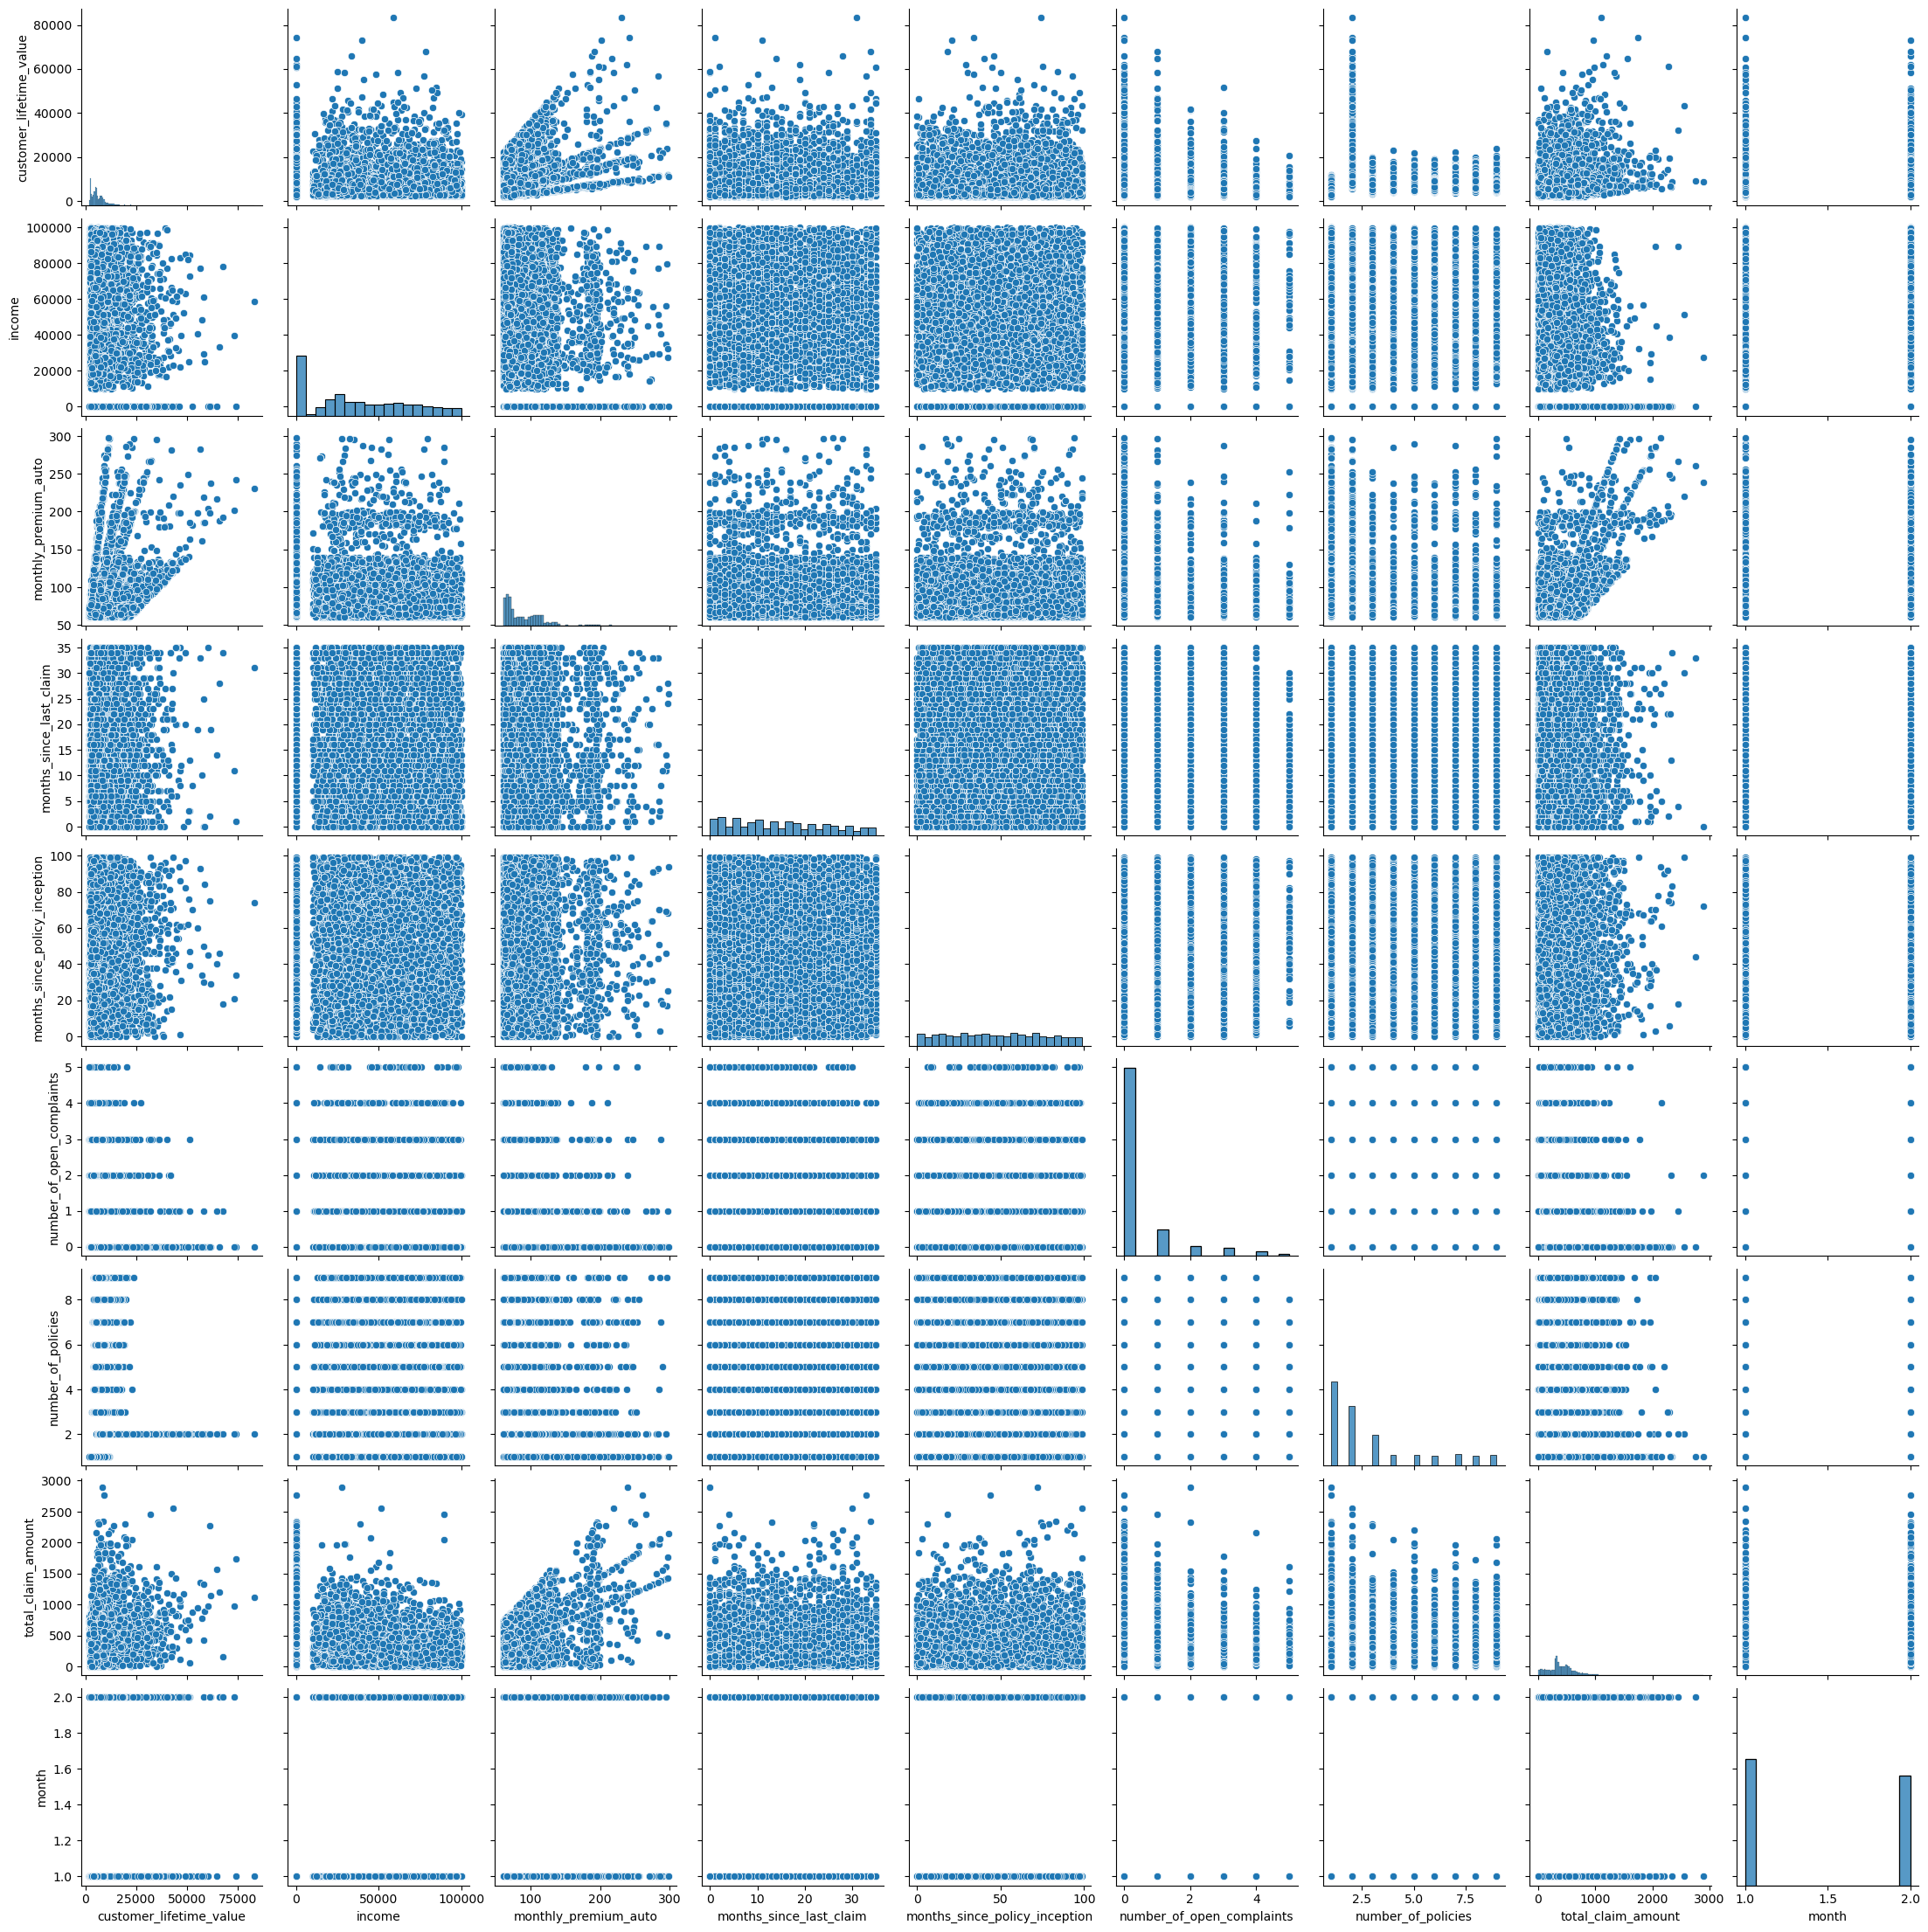

In [26]:
sns.pairplot(mca1[['customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount', 'month']])
plt.show()

# For the numerical variables, check the multicollinearity between the features. 
- Please note that we will use the column total_claim_amount later as the target variable.

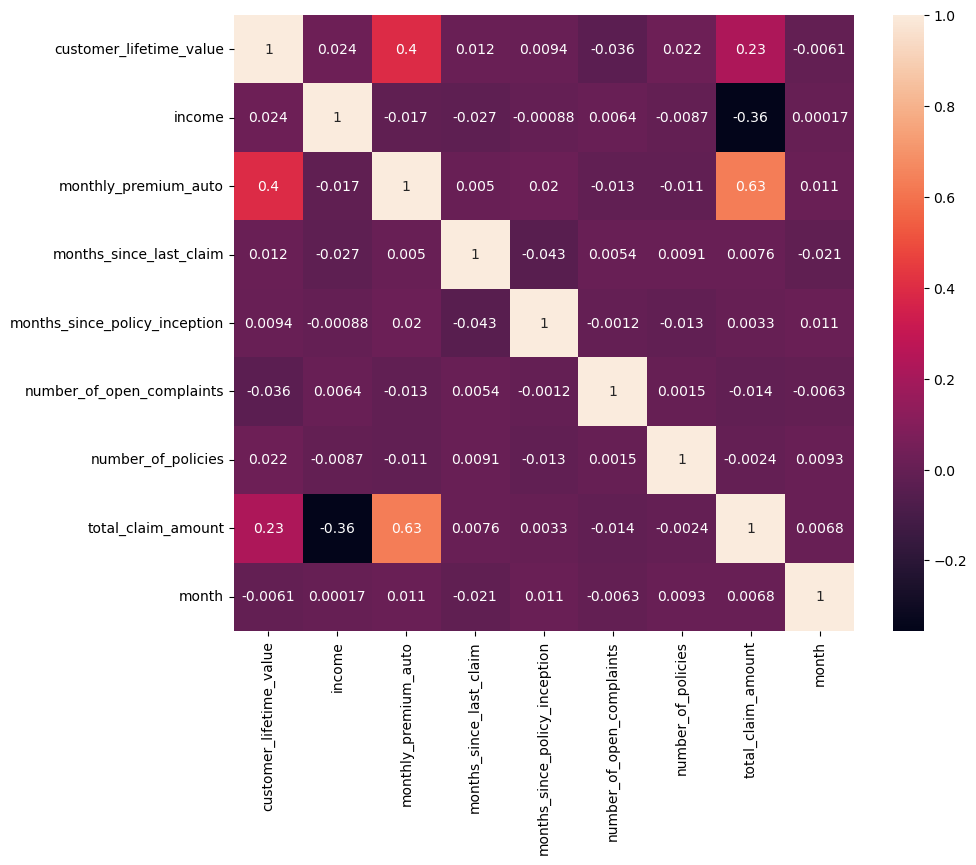

In [27]:
corr_matrix = mca1.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, ax = ax)
plt.show()

# Drop one of the two features that show a high correlation between them (greater than 0.9). 
- Write code for both the correlation matrix and for seaborn heatmap. 
- If there is no pair of features that have a high correlation, then do not drop any features

ANSWER: I cannot see high correlation

# START LAB ROUND 5

# Processig Data 

# X-y split.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
y = mca1['total_claim_amount']
X = mca1[['total_claim_amount']]

In [30]:
lm = LinearRegression().fit(X,y)
lm = LinearRegression()
lm.fit(X,y) # X is the column that we want to use to make predictions. y is the column that we want to predict
print(lm.intercept_) # b_0
print(lm.coef_) # coefficients is an array because later we will see we can have more than one dimension for our gradient

-3.467448550509289e-12
[1.]


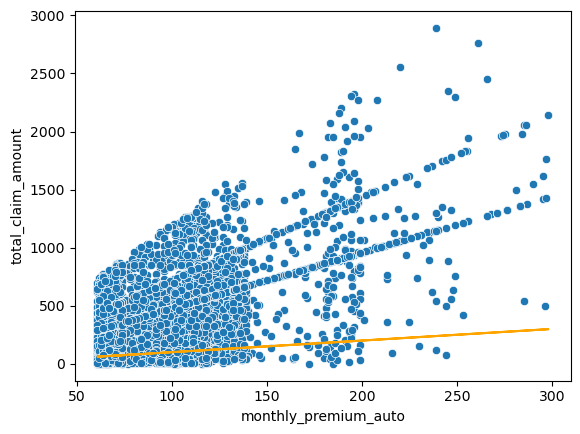

In [31]:
regression_line = lm.intercept_ + lm.coef_[0]*mca1['monthly_premium_auto'] # b_0 + b_1 * x
plt.plot(mca1['monthly_premium_auto'], regression_line, c = 'orange')
sns.scatterplot(x='monthly_premium_auto',y='total_claim_amount',data=mca1)
plt.show()

# Normalize (numerical).

In [32]:
Y=mca1['total_claim_amount']
X=mca1.drop(['total_claim_amount'],axis=1)

X.head()

,cust_id,state,customer_lifetime_value,response,coverage,education,effective_to_date,employment_status,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,1
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,1
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2


In [33]:
Y.head()

0     384.811147
1    1131.464935
2     566.472247
3     529.881344
4     138.130879
Name: total_claim_amount, dtype: float64

In [34]:
print(type(Y))

<class 'pandas.core.series.Series'>


In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cust_id                        9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [36]:
x_num=X.select_dtypes(np.number)
x_cat=X.select_dtypes(object)

In [37]:
x_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_lifetime_value        9134 non-null   float64
 1   income                         9134 non-null   int64  
 2   monthly_premium_auto           9134 non-null   int64  
 3   months_since_last_claim        9134 non-null   int64  
 4   months_since_policy_inception  9134 non-null   int64  
 5   number_of_open_complaints      9134 non-null   int64  
 6   number_of_policies             9134 non-null   int64  
 7   month                          9134 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 571.0 KB


In [38]:
from sklearn.preprocessing import PowerTransformer
from scipy.stats import skew
from scipy.stats import kurtosis

In [39]:
# Normalize numerical 
x_num.apply(skew)

customer_lifetime_value          3.031782
income                           0.286840
monthly_premium_auto             2.123198
months_since_last_claim          0.278541
months_since_policy_inception    0.040158
number_of_open_complaints        2.782806
number_of_policies               1.253127
month                            0.145335
dtype: float64

In [40]:
#Normalizing data

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

In [41]:
transformer = Normalizer().fit(x_num)
x_norm = transformer.transform(x_num) #X_num still an pandas dataframe
print(x_norm.shape)
x_norm

(9134, 8)


array([[4.90491254e-02, 9.98795450e-01, 1.22466656e-03, ...,
        0.00000000e+00, 1.77487907e-05, 3.54975815e-05],
       [9.99888818e-01, 0.00000000e+00, 1.34664468e-02, ...,
        0.00000000e+00, 1.14608058e-03, 1.43260072e-04],
       [2.55493903e-01, 9.66807935e-01, 2.14110478e-03, ...,
        0.00000000e+00, 3.96500886e-05, 3.96500886e-05],
       ...,
       [9.99934799e-01, 0.00000000e+00, 1.04110238e-02, ...,
        3.67447900e-04, 2.44965267e-04, 2.44965267e-04],
       [3.24391164e-01, 9.45912815e-01, 4.13871885e-03, ...,
        0.00000000e+00, 1.29334964e-04, 8.62233094e-05],
       [9.98972296e-01, 0.00000000e+00, 2.94508695e-02, ...,
        0.00000000e+00, 3.82478825e-04, 7.64957651e-04]])

In [42]:
x_num_norm=pd.DataFrame(x_norm)
x_num_norm.head()

,0,1,2,3,4,5,6,7
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0.000035
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,0.000143
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,0.000131
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0.000046


In [43]:
x_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'month'],
      dtype='object')

In [44]:
x_num_norm.columns=x_num.columns
x_num_norm.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0.000035
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,0.000143
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,0.000131
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0.000046


In [45]:
x_num_norm.shape

(9134, 8)

# Start Lab Round 6

# One Hot/Label Encoding (categorical).

In [46]:
x_cat.head()

,cust_id,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [47]:
x_cat.columns

Index(['cust_id', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [48]:
x_cat.drop(['cust_id','effective_to_date'],axis=1,inplace=True)
x_cat.head()

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [49]:
x_cat['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [50]:
x_cat.shape

(9134, 14)

In [51]:
from sklearn.preprocessing import OneHotEncoder

In [52]:
en_x = OneHotEncoder(handle_unknown='ignore') #en_gender=array where gender will be encoded to bools
en_x.fit(x_cat) #categorical=where column gender is stored
#OneHotEncoder(handle_unknown='ignore')
en_x.categories_

en_x_array=en_x.transform(x_cat).toarray()
en_x_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [53]:
x_cat_en=pd.DataFrame(en_x_array)
x_cat_en.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
col_list=list([x_cat['state'].unique()])
print(type(col_list))
print(col_list)

<class 'list'>
[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)]


In [55]:
#print(en_x.categories_)
en_x.get_feature_names_out()

array(['state_Arizona', 'state_California', 'state_Nevada',
       'state_Oregon', 'state_Washington', 'response_No', 'response_Yes',
       'coverage_Basic', 'coverage_Extended', 'coverage_Premium',
       'education_Bachelor', 'education_College', 'education_Doctor',
       'education_High School or Below', 'education_Master',
       'employment_status_Disabled', 'employment_status_Employed',
       'employment_status_Medical Leave', 'employment_status_Retired',
       'employment_status_Unemployed', 'gender_F', 'gender_M',
       'location_code_Rural', 'location_code_Suburban',
       'location_code_Urban', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Single',
       'policy_type_Corporate Auto', 'policy_type_Personal Auto',
       'policy_type_Special Auto', 'policy_Corporate L1',
       'policy_Corporate L2', 'policy_Corporate L3', 'policy_Personal L1',
       'policy_Personal L2', 'policy_Personal L3', 'policy_Special L1',
       'policy_Special L2'

In [56]:
col_list=[]

for i in x_cat:
    col_list.append(x_cat[i].unique())
    
print(col_list)

[array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['Basic', 'Extended', 'Premium'], dtype=object), array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object), array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object), array(['F', 'M'], dtype=object), array(['Suburban', 'Rural', 'Urban'], dtype=object), array(['Married', 'Single', 'Divorced'], dtype=object), array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object), array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Corporate L1', 'Personal L2', 'Special L1',
       'Special L3'], dtype=object), array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object), array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object), array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object), ar

In [57]:
list_col=['Washington', 'Arizona', 'Nevada', 'California', 'Oregon','No', 'Yes','Basic', 'Extended', 'Premium','Bachelor', 'College', 'Master', 'High School or Below', 'Doctor','Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired','F', 'M','Suburban', 'Rural', 'Urban','Married', 'Single', 'Divorced','Corporate Auto', 'Personal Auto', 'Special Auto','Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1','Special L2', 'Corporate L1', 'Personal L2', 'Special L1','Special L3','Offer1', 'Offer3', 'Offer2', 'Offer4','Agent', 'Call Center', 'Web', 'Branch','Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car','Luxury Car','Medsize', 'Small', 'Large']
len(list_col)

57

In [58]:
a=list(en_x.get_feature_names_out())
a

['state_Arizona',
 'state_California',
 'state_Nevada',
 'state_Oregon',
 'state_Washington',
 'response_No',
 'response_Yes',
 'coverage_Basic',
 'coverage_Extended',
 'coverage_Premium',
 'education_Bachelor',
 'education_College',
 'education_Doctor',
 'education_High School or Below',
 'education_Master',
 'employment_status_Disabled',
 'employment_status_Employed',
 'employment_status_Medical Leave',
 'employment_status_Retired',
 'employment_status_Unemployed',
 'gender_F',
 'gender_M',
 'location_code_Rural',
 'location_code_Suburban',
 'location_code_Urban',
 'marital_status_Divorced',
 'marital_status_Married',
 'marital_status_Single',
 'policy_type_Corporate Auto',
 'policy_type_Personal Auto',
 'policy_type_Special Auto',
 'policy_Corporate L1',
 'policy_Corporate L2',
 'policy_Corporate L3',
 'policy_Personal L1',
 'policy_Personal L2',
 'policy_Personal L3',
 'policy_Special L1',
 'policy_Special L2',
 'policy_Special L3',
 'renew_offer_type_Offer1',
 'renew_offer_type_Of

In [59]:
x_cat_en.columns=list(en_x.get_feature_names())
x_cat_en.head()

/Users/belma/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,x0_Arizona,x0_California,x0_Nevada,x0_Oregon,x0_Washington,x1_No,x1_Yes,x2_Basic,x2_Extended,x2_Premium,...,x11_Web,x12_Four-Door Car,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Concat Concat DataFrames

In [60]:
x_new=pd.concat([x_num_norm,x_cat_en],axis=1)
print(x_new.shape)
x_new.head()

(9134, 65)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,x0_Arizona,x0_California,...,x11_Web,x12_Four-Door Car,x12_Luxury Car,x12_Luxury SUV,x12_SUV,x12_Sports Car,x12_Two-Door Car,x13_Large,x13_Medsize,x13_Small
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.0,0.000018,0.000035,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.0,0.001146,0.000143,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.0,0.000040,0.000040,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.0,0.000915,0.000131,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.0,0.000023,0.000046,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
